In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import math
import array

In [5]:
df = pd.read_csv('D:\\M tech project\\newdata2000to2003.csv')

In [6]:
df['Time'][len(df)-1] # for last day 

'2003-12-31 23:00:00'

In [7]:
df.head() # Show file

,DHI,DNI,GHI,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Time
0,0,0,0,20,970,93.02,177.08,234.4,0.3,2000-01-01 00:00:00
1,0,0,0,19,970,97.36,164.22,264.5,0.4,2000-01-01 01:00:00
2,0,0,0,19,960,100.00,150.44,286.8,0.5,2000-01-01 02:00:00
3,0,0,0,19,960,98.15,136.67,303.4,0.7,2000-01-01 03:00:00
4,0,0,0,19,960,96.73,123.02,309.7,0.8,2000-01-01 04:00:00


In [8]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    sequence = np.array(sequence).tolist()
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    #print(X)
    #print(y)
    return (X,y)
 
# define input sequence
raw_seq = ['GHI']
# choose a number of time steps
n_steps = 24
# split into samples


In [9]:
(X1, y1) = split_sequence(df['GHI'], n_steps)
(X2, y2) = split_sequence(df['Temperature'], n_steps)
(X3, y3) = split_sequence(df['Relative Humidity'], n_steps)
(X4, y4) = split_sequence(df['Solar Zenith Angle'], n_steps)
n_features = 4
y = y1

In [10]:
def normalise(arr):
    mx = -1
    mn = 1<<32
    for row in arr:
        for ele in row:
            if ele<mn:
                mn = ele
            if ele>mx:
                mx = ele
        
    rng = mx-mn
    newArr = []
    for row in arr:
        newRow = []
        for ele in row:
            newRow.append((ele-mn)/rng)
        newArr.append(newRow)
    return newArr

In [11]:
X1norm = normalise(X1)
X2norm = normalise(X2)
X3norm = normalise(X3)
X4norm = normalise(X4)

In [12]:
print(type(X1))
print(type(X1[0]))
print(len(X1))
print(len(X1[0]))

<class 'list'>
<class 'list'>
35016
24


In [13]:
X = []
for i in zip(X1norm,X2norm,X3norm,X4norm):
    newRow = [*i[0],*i[1],*i[2],*i[3]]
    X.append(newRow)

In [14]:
print(len(X))
print(len(X[0]))
print(type(X))
print(type(X[0]))

35016
96
<class 'list'>
<class 'list'>


In [15]:
a = [[1,2,3],
     [4,5,6]
    ]
b = [[7,8,9],
     [10,11,12]
    ]
c= []
for i in zip(a,b):
    a1 = i[0]
    b1 = i[1]
    c1 = [*a1,*b1]
    c.append(c1)
print(c)

[[1, 2, 3, 7, 8, 9], [4, 5, 6, 10, 11, 12]]


In [16]:
#plt.plot(df['Time'],df['GHI'])
#plt.show()

array([[<AxesSubplot:title={'center':'GHI'}>]], dtype=object)

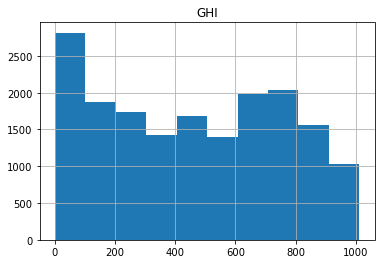

In [17]:
df[df['GHI']!=0].hist(column='GHI')

In [18]:
print(type(y))

<class 'list'>


In [19]:
n_features = 1

In [22]:
import tensorflow as tf
from tensorflow import keras
# define model
model = keras.Sequential([
    keras.layers.Dense(100, input_dim=n_steps*n_features, activation = 'relu'), #1 =output, input = stepes,
    keras.layers.Dense(1, activation = 'relu')
])

model.compile(optimizer='adam',   
              loss='mse')#Adam is an optimization algorithm that can be used 
#instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


In [23]:
model.fit(X1norm, y, epochs=4000,verbose=1) #An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

Epoch 1/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 71292.5000
Epoch 2/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 5781.4082
Epoch 3/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 4495.0625
Epoch 4/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 4260.8628
Epoch 5/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 4069.7852
Epoch 6/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3909.1921
Epoch 7/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3794.9473
Epoch 8/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3709.5750
Epoch 9/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3638.6772
Epoch 10/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3588.5938
Epoch 11/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3544.6980
Epoch 12/4000
1095/1095 [====

1095/1095 [==============================] - 2s 2ms/step - loss: 3277.1589
Epoch 94/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3272.7881
Epoch 95/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3271.9028
Epoch 96/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3270.7375
Epoch 97/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3271.1750
Epoch 98/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3266.1892
Epoch 99/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3266.5186
Epoch 100/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3265.9648
Epoch 101/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3263.8618
Epoch 102/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3259.1716
Epoch 103/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3258.3821
Epoch 104/4000
1095/1095 [=====

1095/1095 [==============================] - 3s 2ms/step - loss: 3146.5713
Epoch 185/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3142.8433
Epoch 186/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3142.9768
Epoch 187/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3142.2209
Epoch 188/4000
1095/1095 [==============================] - 3s 3ms/step - loss: 3141.6111
Epoch 189/4000
1095/1095 [==============================] - 3s 3ms/step - loss: 3139.5371
Epoch 190/4000
1095/1095 [==============================] - 3s 3ms/step - loss: 3139.5662
Epoch 191/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3140.2993
Epoch 192/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3135.8970
Epoch 193/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3137.1028
Epoch 194/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3133.9333
Epoch 195/4000
1095/1095 

1095/1095 [==============================] - 2s 2ms/step - loss: 3078.7634
Epoch 276/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3074.9756
Epoch 277/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3073.9382
Epoch 278/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3076.2710
Epoch 279/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3073.9517
Epoch 280/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3076.1113
Epoch 281/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3077.7996
Epoch 282/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3073.3799
Epoch 283/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3074.5911
Epoch 284/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3075.8535
Epoch 285/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3069.9548
Epoch 286/4000
1095/1095 

1095/1095 [==============================] - 2s 1ms/step - loss: 3050.0439
Epoch 367/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3049.1946
Epoch 368/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3046.1746
Epoch 369/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3043.3887
Epoch 370/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3049.6240
Epoch 371/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3048.3140
Epoch 372/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3046.6995
Epoch 373/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3045.4487
Epoch 374/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3045.5203
Epoch 375/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3048.3425
Epoch 376/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3046.5581
Epoch 377/4000
1095/1095 

1095/1095 [==============================] - 2s 2ms/step - loss: 3034.4670
Epoch 458/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3035.7932
Epoch 459/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3035.0496
Epoch 460/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3036.0359
Epoch 461/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3034.9482
Epoch 462/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3036.9666
Epoch 463/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3036.2178
Epoch 464/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3036.8987
Epoch 465/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3036.9680
Epoch 466/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3034.1521
Epoch 467/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3034.3025
Epoch 468/4000
1095/1095 

1095/1095 [==============================] - 2s 2ms/step - loss: 3031.0566
Epoch 549/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3028.5000
Epoch 550/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3032.3633
Epoch 551/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3030.5762
Epoch 552/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3033.6062
Epoch 553/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3031.4080
Epoch 554/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3028.4004
Epoch 555/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3027.7732
Epoch 556/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3029.2234
Epoch 557/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3029.4370
Epoch 558/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3029.0339
Epoch 559/4000
1095/1095 

1095/1095 [==============================] - 2s 1ms/step - loss: 3025.5559
Epoch 640/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3026.8721
Epoch 641/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3027.3438
Epoch 642/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3025.4131
Epoch 643/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3029.2764
Epoch 644/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3024.8608
Epoch 645/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3025.0042
Epoch 646/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3025.9648
Epoch 647/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3026.1028
Epoch 648/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3024.4922
Epoch 649/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3027.1187
Epoch 650/4000
1095/1095 

1095/1095 [==============================] - 1s 1ms/step - loss: 3024.6880
Epoch 730/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3024.3843
Epoch 731/4000
1095/1095 [==============================] - 1s 946us/step - loss: 3023.8887
Epoch 732/4000
1095/1095 [==============================] - 1s 902us/step - loss: 3019.5137
Epoch 733/4000
1095/1095 [==============================] - 1s 944us/step - loss: 3023.3718
Epoch 734/4000
1095/1095 [==============================] - 1s 916us/step - loss: 3023.4919
Epoch 735/4000
1095/1095 [==============================] - 1s 968us/step - loss: 3025.0710
Epoch 736/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3022.8804
Epoch 737/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3022.5581
Epoch 738/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3021.2417
Epoch 739/4000
1095/1095 [==============================] - 1s 900us/step - loss: 3023.8879
Epoch 740/400

1095/1095 [==============================] - 1s 1ms/step - loss: 3021.7563
Epoch 820/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3022.7854
Epoch 821/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3021.9807
Epoch 822/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3020.0396
Epoch 823/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3022.7488
Epoch 824/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3022.1899
Epoch 825/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3019.0520
Epoch 826/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3021.0732
Epoch 827/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3018.7556
Epoch 828/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3020.1497
Epoch 829/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3022.6377
Epoch 830/4000
1095/1095 

1095/1095 [==============================] - 1s 1ms/step - loss: 3021.1272
Epoch 911/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3020.0361
Epoch 912/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3020.4065
Epoch 913/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3017.4131
Epoch 914/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3019.6260
Epoch 915/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3016.4856
Epoch 916/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3018.8254
Epoch 917/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3018.4465
Epoch 918/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3017.9646
Epoch 919/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3017.7056
Epoch 920/4000
1095/1095 [==============================] - 2s 1ms/step - loss: 3019.6147
Epoch 921/4000
1095/1095 

1095/1095 [==============================] - 1s 1ms/step - loss: 3019.6233
Epoch 1002/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3018.1165
Epoch 1003/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3018.0598
Epoch 1004/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3015.8213
Epoch 1005/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3020.0205
Epoch 1006/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3016.2451
Epoch 1007/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3018.5435
Epoch 1008/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3019.8242
Epoch 1009/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3017.6929
Epoch 1010/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3018.6707
Epoch 1011/4000
1095/1095 [==============================] - 1s 1ms/step - loss: 3019.1567
Epoch 1012/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 3013.1311
Epoch 1092/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.0942
Epoch 1093/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3017.7170
Epoch 1094/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3017.0864
Epoch 1095/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3015.2676
Epoch 1096/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.5464
Epoch 1097/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3018.2988
Epoch 1098/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3014.2224
Epoch 1099/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3014.7212
Epoch 1100/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3016.6665
Epoch 1101/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3016.0588
Epoch 1102/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 3016.3481
Epoch 1182/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.3665
Epoch 1183/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3015.2183
Epoch 1184/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3015.4966
Epoch 1185/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3015.9880
Epoch 1186/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.9150
Epoch 1187/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3014.4028
Epoch 1188/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3016.2510
Epoch 1189/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3015.7603
Epoch 1190/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.2026
Epoch 1191/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3014.7817
Epoch 1192/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 3011.9036
Epoch 1272/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3016.2739
Epoch 1273/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3016.1370
Epoch 1274/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.5620
Epoch 1275/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3017.0439
Epoch 1276/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3015.0884
Epoch 1277/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.4661
Epoch 1278/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3015.5374
Epoch 1279/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.8806
Epoch 1280/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3016.8167
Epoch 1281/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.6938
Epoch 1282/4000

1095/1095 [==============================] - 3s 2ms/step - loss: 3014.5659
Epoch 1362/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3013.0820
Epoch 1363/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.4868
Epoch 1364/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.3113
Epoch 1365/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.2761
Epoch 1366/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.6958
Epoch 1367/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3009.2207
Epoch 1368/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.7561
Epoch 1369/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.1758
Epoch 1370/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.5935
Epoch 1371/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.2563
Epoch 1372/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 3013.1868
Epoch 1452/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.4014
Epoch 1453/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.9458
Epoch 1454/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.6506
Epoch 1455/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3009.1462
Epoch 1456/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 3011.0100
Epoch 1457/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.2441
Epoch 1458/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.7112
Epoch 1459/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.6575
Epoch 1460/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3013.5239
Epoch 1461/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.3167
Epoch 1462/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 3011.5271
Epoch 1542/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3008.6499
Epoch 1543/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.5083
Epoch 1544/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.9783
Epoch 1545/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.6250
Epoch 1546/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.6555
Epoch 1547/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.4111
Epoch 1548/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3008.7610
Epoch 1549/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.2544
Epoch 1550/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.3201
Epoch 1551/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.6992
Epoch 1552/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 3012.3535
Epoch 1632/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3009.7461
Epoch 1633/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3009.6138
Epoch 1634/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3010.7046
Epoch 1635/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3007.7334
Epoch 1636/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3007.6060
Epoch 1637/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.8152
Epoch 1638/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3009.0681
Epoch 1639/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.1697
Epoch 1640/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3012.1658
Epoch 1641/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 3011.0334
Epoch 1642/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2988.6851
Epoch 1722/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2988.2651
Epoch 1723/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2988.9011
Epoch 1724/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2986.1948
Epoch 1725/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2987.4324
Epoch 1726/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2982.7268
Epoch 1727/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2986.9880
Epoch 1728/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2985.9797
Epoch 1729/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2987.4663
Epoch 1730/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2985.1870
Epoch 1731/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2983.2319
Epoch 1732/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2962.9473
Epoch 1812/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2962.5662
Epoch 1813/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2966.9336
Epoch 1814/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2959.4019
Epoch 1815/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2961.6443
Epoch 1816/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2961.8906
Epoch 1817/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 2962.1262
Epoch 1818/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2964.1689
Epoch 1819/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2959.9626
Epoch 1820/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2960.2773
Epoch 1821/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2960.5244
Epoch 1822/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2950.4255
Epoch 1902/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2947.7092
Epoch 1903/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2947.4036
Epoch 1904/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2947.3000
Epoch 1905/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2948.1643
Epoch 1906/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2949.1411
Epoch 1907/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2950.8989
Epoch 1908/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2947.7117
Epoch 1909/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2947.5410
Epoch 1910/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2946.7478
Epoch 1911/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2944.3259
Epoch 1912/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2939.4580
Epoch 1992/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2938.4250
Epoch 1993/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2938.3005
Epoch 1994/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2937.6594
Epoch 1995/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2936.0327
Epoch 1996/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2938.9827
Epoch 1997/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2937.3760
Epoch 1998/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2937.5574
Epoch 1999/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2939.6096
Epoch 2000/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2939.7971
Epoch 2001/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2937.9512
Epoch 2002/4000

1095/1095 [==============================] - 1s 773us/step - loss: 2929.2097
Epoch 2080/4000
1095/1095 [==============================] - 1s 769us/step - loss: 2928.9502
Epoch 2081/4000
1095/1095 [==============================] - 1s 780us/step - loss: 2928.6599
Epoch 2082/4000
1095/1095 [==============================] - 1s 777us/step - loss: 2929.1240
Epoch 2083/4000
1095/1095 [==============================] - 1s 775us/step - loss: 2930.7566
Epoch 2084/4000
1095/1095 [==============================] - 1s 774us/step - loss: 2927.8354
Epoch 2085/4000
1095/1095 [==============================] - 1s 829us/step - loss: 2929.6716
Epoch 2086/4000
1095/1095 [==============================] - 1s 928us/step - loss: 2924.8704
Epoch 2087/4000
1095/1095 [==============================] - 1s 962us/step - loss: 2929.6565
Epoch 2088/4000
1095/1095 [==============================] - 1s 877us/step - loss: 2929.6843
Epoch 2089/4000
1095/1095 [==============================] - 1s 990us/step - loss: 292

1095/1095 [==============================] - 2s 2ms/step - loss: 2923.3760
Epoch 2168/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2921.7026
Epoch 2169/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2922.1448
Epoch 2170/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2922.7327
Epoch 2171/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2918.3599
Epoch 2172/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2921.7275
Epoch 2173/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2919.8572
Epoch 2174/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2921.8240
Epoch 2175/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2922.3518
Epoch 2176/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2921.6750
Epoch 2177/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2919.0005
Epoch 2178/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2913.8274
Epoch 2258/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2917.0759
Epoch 2259/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2914.2966
Epoch 2260/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2914.9778
Epoch 2261/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2913.5217
Epoch 2262/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2914.8452
Epoch 2263/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2914.8911
Epoch 2264/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2913.2136
Epoch 2265/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2914.5686
Epoch 2266/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2915.7336
Epoch 2267/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2915.0559
Epoch 2268/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2907.7729
Epoch 2348/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2909.1729
Epoch 2349/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2907.3831
Epoch 2350/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2907.0608
Epoch 2351/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2908.3235
Epoch 2352/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2905.8479
Epoch 2353/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2910.7373
Epoch 2354/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2906.8333
Epoch 2355/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2908.0337
Epoch 2356/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2905.3147
Epoch 2357/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2907.1821
Epoch 2358/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2902.8640
Epoch 2438/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2901.9143
Epoch 2439/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2903.8196
Epoch 2440/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2900.0730
Epoch 2441/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2900.7271
Epoch 2442/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2902.6470
Epoch 2443/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2902.1328
Epoch 2444/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2903.6860
Epoch 2445/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2902.2754
Epoch 2446/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2902.4810
Epoch 2447/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2902.0569
Epoch 2448/4000

1095/1095 [==============================] - 3s 3ms/step - loss: 2896.8455
Epoch 2528/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2895.0581
Epoch 2529/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2895.8955
Epoch 2530/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2897.0881
Epoch 2531/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2894.4546
Epoch 2532/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2895.6394
Epoch 2533/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2894.9763
Epoch 2534/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2900.2505
Epoch 2535/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2895.8311
Epoch 2536/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2895.8469
Epoch 2537/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2895.6875
Epoch 2538/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2893.3064
Epoch 2618/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2891.0344
Epoch 2619/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2889.8950
Epoch 2620/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2893.4424
Epoch 2621/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2893.7527
Epoch 2622/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2893.1177
Epoch 2623/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2891.3738
Epoch 2624/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2889.8623
Epoch 2625/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2892.3501
Epoch 2626/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2887.8738
Epoch 2627/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2891.5427
Epoch 2628/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2888.6296
Epoch 2708/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2886.4880
Epoch 2709/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2885.3330
Epoch 2710/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2885.8606
Epoch 2711/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2885.1951
Epoch 2712/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2887.2256
Epoch 2713/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2885.9875
Epoch 2714/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2886.1313
Epoch 2715/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2885.9602
Epoch 2716/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2885.3105
Epoch 2717/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2886.7561
Epoch 2718/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2882.3618
Epoch 2798/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2881.7969
Epoch 2799/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2881.8113
Epoch 2800/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2882.2561
Epoch 2801/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2882.7512
Epoch 2802/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2882.7549
Epoch 2803/4000
1095/1095 [==============================] - 3s 2ms/step - loss: 2886.7986
Epoch 2804/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2882.2275
Epoch 2805/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2881.7236
Epoch 2806/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2878.8030
Epoch 2807/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2879.8281
Epoch 2808/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2872.2300
Epoch 2888/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2871.8271
Epoch 2889/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2872.7573
Epoch 2890/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2871.8059
Epoch 2891/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2872.8108
Epoch 2892/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2875.4353
Epoch 2893/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2871.4009
Epoch 2894/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2874.0435
Epoch 2895/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2873.6152
Epoch 2896/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2872.4646
Epoch 2897/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2870.8628
Epoch 2898/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2850.0481
Epoch 2978/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2853.1648
Epoch 2979/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2852.6404
Epoch 2980/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2853.1528
Epoch 2981/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2854.4592
Epoch 2982/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2853.4121
Epoch 2983/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2854.9749
Epoch 2984/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2852.8008
Epoch 2985/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2851.2124
Epoch 2986/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2853.0574
Epoch 2987/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2851.9429
Epoch 2988/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2839.6064
Epoch 3067/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2837.8574
Epoch 3068/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2838.8320
Epoch 3069/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2841.0393
Epoch 3070/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2840.3433
Epoch 3071/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2843.3391
Epoch 3072/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2839.9661
Epoch 3073/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2838.5750
Epoch 3074/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2835.7271
Epoch 3075/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2841.8950
Epoch 3076/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2843.0613
Epoch 3077/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2833.4717
Epoch 3157/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2835.2910
Epoch 3158/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2833.3364
Epoch 3159/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2833.5889
Epoch 3160/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2832.2847
Epoch 3161/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2831.0076
Epoch 3162/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2830.7314
Epoch 3163/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2833.2927
Epoch 3164/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2829.2395
Epoch 3165/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2832.7581
Epoch 3166/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2831.7542
Epoch 3167/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2823.6875
Epoch 3247/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2823.3923
Epoch 3248/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2824.4988
Epoch 3249/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2822.4421
Epoch 3250/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2820.6523
Epoch 3251/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2822.3862
Epoch 3252/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2823.2188
Epoch 3253/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2822.7595
Epoch 3254/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2823.7456
Epoch 3255/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2822.8901
Epoch 3256/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2819.8892
Epoch 3257/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2814.7419
Epoch 3337/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2816.2673
Epoch 3338/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2812.8813
Epoch 3339/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2813.8335
Epoch 3340/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2814.2678
Epoch 3341/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2814.8909
Epoch 3342/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2811.4121
Epoch 3343/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2814.5942
Epoch 3344/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2812.5525
Epoch 3345/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2817.4424
Epoch 3346/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2814.0295
Epoch 3347/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2805.5869
Epoch 3427/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2806.0474
Epoch 3428/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2806.4971
Epoch 3429/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2807.0845
Epoch 3430/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2805.4075
Epoch 3431/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2805.6008
Epoch 3432/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2806.6841
Epoch 3433/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2805.8093
Epoch 3434/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2805.4717
Epoch 3435/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2803.0757
Epoch 3436/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2806.0125
Epoch 3437/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2798.6028
Epoch 3517/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2797.6748
Epoch 3518/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2798.6055
Epoch 3519/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2796.6824
Epoch 3520/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2796.9277
Epoch 3521/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2795.2600
Epoch 3522/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2795.0125
Epoch 3523/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2796.3015
Epoch 3524/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2795.7363
Epoch 3525/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2797.8010
Epoch 3526/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2794.8003
Epoch 3527/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2788.0088
Epoch 3607/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2786.8149
Epoch 3608/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2784.6826
Epoch 3609/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2787.2522
Epoch 3610/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2789.4644
Epoch 3611/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2786.4492
Epoch 3612/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2788.5405
Epoch 3613/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2784.9968
Epoch 3614/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2787.4602
Epoch 3615/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2783.9946
Epoch 3616/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2787.4600
Epoch 3617/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2774.5176
Epoch 3697/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2775.0776
Epoch 3698/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2774.2236
Epoch 3699/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2774.4263
Epoch 3700/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2776.3052
Epoch 3701/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2774.2996
Epoch 3702/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2773.9934
Epoch 3703/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2774.5715
Epoch 3704/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2772.4968
Epoch 3705/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2773.0881
Epoch 3706/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2773.2227
Epoch 3707/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2761.6895
Epoch 3787/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2762.6677
Epoch 3788/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2763.6929
Epoch 3789/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2759.7900
Epoch 3790/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2760.4167
Epoch 3791/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2758.4465
Epoch 3792/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2760.9243
Epoch 3793/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2761.3081
Epoch 3794/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2758.8394
Epoch 3795/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2760.5017
Epoch 3796/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2763.0981
Epoch 3797/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2747.4192
Epoch 3877/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2747.6914
Epoch 3878/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2748.8347
Epoch 3879/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2746.9062
Epoch 3880/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2749.0283
Epoch 3881/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2746.9688
Epoch 3882/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2746.4231
Epoch 3883/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2743.8428
Epoch 3884/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2746.8997
Epoch 3885/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2750.2446
Epoch 3886/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2745.1392
Epoch 3887/4000

1095/1095 [==============================] - 2s 2ms/step - loss: 2732.5417
Epoch 3967/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2734.3875
Epoch 3968/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2732.3994
Epoch 3969/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2732.6743
Epoch 3970/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2734.5442
Epoch 3971/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2733.2290
Epoch 3972/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2730.3008
Epoch 3973/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2736.2695
Epoch 3974/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2729.7778
Epoch 3975/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2732.4058
Epoch 3976/4000
1095/1095 [==============================] - 2s 2ms/step - loss: 2731.2493
Epoch 3977/4000

In [58]:
model.save('D:\\Hitendra Singh\\M tech project\\MLP1feature')

INFO:tensorflow:Assets written to: D:\Hitendra Singh\M tech project\MLP1feature\assets


In [56]:
#Testing

In [5]:
from tensorflow import keras
model = keras.models.load_model('D:\\Hitendra Singh\\M tech project\\MLP1feature')

In [25]:
df = pd.read_csv('D:\\M tech project\\newdata2004.csv')

In [26]:
df.head()

,DHI,DNI,GHI,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Wind Direction,Wind Speed,Time
0,0,0,0,19,970,66.62,177.09,154.3,3.0,2004-01-01 00:00:00
1,0,0,0,18,970,69.33,164.22,159.4,2.8,2004-01-01 01:00:00
2,0,0,0,17,970,72.41,150.44,163.6,2.7,2004-01-01 02:00:00
3,0,0,0,17,970,76.07,136.67,168.8,2.6,2004-01-01 03:00:00
4,0,0,0,16,970,80.20,123.02,175.4,2.3,2004-01-01 04:00:00


In [27]:
(X1test, y1test) = split_sequence(df['GHI'], n_steps)
(X2test, y2test) = split_sequence(df['Temperature'], n_steps)
(X3test, y3test) = split_sequence(df['Relative Humidity'], n_steps)
(X4test, y4test) = split_sequence(df['Solar Zenith Angle'], n_steps)
n_features = 1
y_test = y1test

In [28]:
len(y_test)

8736

In [29]:
len(X1test)

8736

In [30]:
X1test_norm = normalise(X1test)
X2test_norm = normalise(X2test)
X3test_norm = normalise(X3test)
X4test_norm = normalise(X4test)

In [31]:
X_test = []
for i in zip(X1test_norm,X2test_norm,X3test_norm,X4test_norm):
    newRow = [*i[0],*i[1],*i[2],*i[3]]
    X_test.append(newRow)

In [32]:
len(X_test)

8736

In [33]:
def predictHR(yer,m,d,h):
    timeStamp = pd.Timestamp(year = yer,month=m,day=d,hour=h)
    timeStamp = str(timeStamp)
    i = 0
    while i <len(df):
        Time = df['Time'][i]
        if Time==timeStamp:
            test_index = i
            break
        i+=1
    print('Actual value:',y_test[test_index])
    return y_model[test_index][0]
    

In [34]:
print('Predicted:',predictHR(2004,12,28,15))

Actual value: 408


NameError: name 'y_model' is not defined

In [35]:
y_model = model.predict(X1test_norm)

In [36]:
score = model.evaluate(X1test_norm,y_test)
print('model mean: ',np.mean(y_model))
print('actual mean: ',np.mean(y_test))
print('MSE: ',score)
print('RMSE: ',math.sqrt(score))

273/273 [==============================] - 1s 1ms/step - loss: 2464.0386
model mean:  232.54524
actual mean:  234.74679487179486
MSE:  2464.03857421875
RMSE:  49.63908313233384


In [37]:
St = 0
ymean = np.mean(y_test)
for yi in y_test:
    St += (yi-ymean)**2


In [38]:
Sr = 0
for i in range(len(y_model)):
    Sr += (y_test[i]-y_model[i])**2


In [39]:
R2 = 1- Sr/St
print(R2)

[0.9751612]


In [40]:
xa = np.linspace(0,max(y_test),max(y_test))

In [41]:
%matplotlib qt5

In [42]:
#fig1 = plt.figure(1)
#ax1 = fig1.add_axes([0,0.02,1.2,1.2],frameon=True,xlabel="Actual")
#ax1.set_fontsize
#s1 = ax1.scatter(y,y_model)

#p1 = ax1.plot(xa,xa,'-r')
#ax1.set_ylabel('Predicted', fontsize=25)
#ax1.set_xlabel('Actual',fontsize=25)

#plt.show()

In [43]:
plt.scatter(y_test,y_model)
plt.plot(xa,xa,'-r')
plt.ylabel('Predicted Irradiance (W/sq m)',fontsize=35)
plt.xlabel('Measured Irradiance (W/sq m)',fontsize=35)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()

In [44]:
xb = np.linspace(1,len(y_test),len(y_test))

In [45]:

plt.plot(xb,y_model,'b--',label='Predicted Irradiance (W/sq m)')
plt.legend(loc=1, prop={'size': 20})

plt.plot(xb,y_test,'r',label='Measured Irradiance (W/sq m)')
plt.legend(loc=1, prop={'size': 20})

plt.ylabel('GHI (W/sq m)',fontsize=35)
plt.xlabel('Time(hours)',fontsize=35)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()

In [68]:
X_test = newX[-1]
X_test = np.reshape(np.array(X_test),(1,24))

NameError: name 'newX' is not defined

In [69]:
for i in range(24):
    yp = model.predict(X_test)
    #print(X_test)
    print(yp[0][0])   #Predicted value
    X_test = np.delete(X_test,0)
    X_test = np.append(X_test,yp[0][0])
    X_test = np.reshape(np.array(X_test),(1,24))

ValueError: in user code:

    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\Lenovo\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 24 but received input with shape [32, 96]


In [29]:
len(newX[-1])

24

In [30]:
plotY = [*newX[-3],*newX[-2],*newX[-1],*X_test[0]]

In [31]:
plotX = np.linspace(1,24*4,24*4)

In [94]:
plt.plot(plotX,plotY)
plt.axvline(x=24*3,color='r')
plt.ylabel('Global Horizontal Irradiance (GHI)',fontsize=45)
plt.xlabel('Time(hours)',fontsize=50)

plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)

plt.show()

In [33]:
print(len(y))

26256


In [46]:
area_of_pv = 700 #meter sq

In [47]:
efficiency = 17.32

In [48]:
derating_pv = 0.85

In [49]:
temp = df['Temperature']

In [50]:
pv = []
for i in range(len(y_test)):
    pv.append(area_of_pv *efficiency *y_test[i] *(1-0.005*(temp[i]-25)))

In [51]:
pv_predicted = []
for i in range(len(y_model)):
    pv_predicted.append(area_of_pv *efficiency *y_model[i] *(1-0.005*(temp[i]-25)))

In [55]:
day = 200
beg = 24 * day
end = 24 * (day+5) +1

In [56]:
xb = np.linspace(1,len(y_test[beg:end]),len(y_test[beg:end]))

In [57]:


plt.plot(xb,pv_predicted[beg:end],'b--',linewidth = 4,label='Predicted Power (kW)')
plt.legend(loc=1, prop={'size': 20})

plt.plot(xb,pv[beg:end],'r-',linewidth = 2,label='Measured Power(kW)')
plt.legend(loc=1, prop={'size': 20})

plt.xlabel('Time(hours)',fontsize=35)
plt.ylabel('Power (kW)',fontsize=35)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()

In [73]:
xc = np.linspace(1,len(pv_predicted),len(pv_predicted))

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(xc,pv,'r',label='Measured Power(kW)')
plt.legend(loc=1, prop={'size': 15})
plt.xlabel('Time(hours)',fontsize=35)
plt.ylabel('Measured Power (kW)',fontsize=35)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)


plt.subplot(1,2,2)
plt.plot(xc,pv_predicted,'b',label='Predicted Power (kW)')
plt.legend(loc=1, prop={'size': 15})
plt.xlabel('Time(hours)',fontsize=35)
plt.ylabel('Predicted Power (kW)',fontsize=35)


plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)

plt.show()

In [41]:
error=[]
for i in range(len(y)):
    error.append(abs(y[i]-y_model[i])) #error

In [42]:
error=[]
for i in range(len(y)):
    error.append(abs(y[i]-y_model[i])/(y[i]+0.0001))# relative error this line

In [43]:
plt.plot(xb,error)
plt.xlabel('Time',fontsize=55)
plt.ylabel('Error',fontsize=55)

plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)

plt.show()

In [44]:
plt.semilogy(xb,error) #semilog scale
plt.xlabel('Time',fontsize=55)
plt.ylabel('Error',fontsize=55)

plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)

plt.show()

In [45]:
import matplotlib.pyplot as plt
w = 4
h = 3
d = 70
plt.figure(figsize=(w, h), dpi=d)

y1 = [9, 9, 9]
plt.plot(y1)
y2 = [9, 9, 9]
plt.plot(y2)
plt.legend(["blue", "green"])
plt.savefig("out.png")

In [46]:
#UNDER FIGURE  LABEL SIZE INCREASES 

plt.plot([1, 2, 3], label='Inline label')
plt.legend(loc=1, prop={'size': 55})


In [47]:
#LEGEND FONT SIZE INCRESES
plt.xlabel('Time',fontsize=55)
plt.ylabel('Error',fontsize=55)


Text(9.055555555555554, 0.5, 'Error')

In [48]:
#FOR SIDE SCALE LARGE FUNCATION
start = 10**12
finish = 1.1*10**12
y = np.linspace(start , finish)
pd.DataFrame(y).plot()
plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=17)